In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

In [2]:
os.listdir('../data')

['df.xlsx',
 'holidays_events.csv',
 'items.csv',
 'oil.csv',
 'sample_submission.csv',
 'stores.csv',
 'test.csv',
 'train+oil.xlsx',
 'train.csv',
 'transactions.csv']

## Load the data into DataFrame

In [3]:
train_df = pd.read_csv('../data/train.csv', parse_dates = ['date'])

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train_df.shape

(125497040, 6)

In [5]:
train_df.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [6]:
df = train_df[(train_df['store_nbr'] == 44)]

In [7]:
store_sub = train_df[(train_df['store_nbr'] == 44) & (train_df['item_nbr'] == 1503844)]
store_sub.reset_index(drop = True, inplace = True)

In [8]:
store_sub.shape

(1016, 6)

## View data as a function of time 

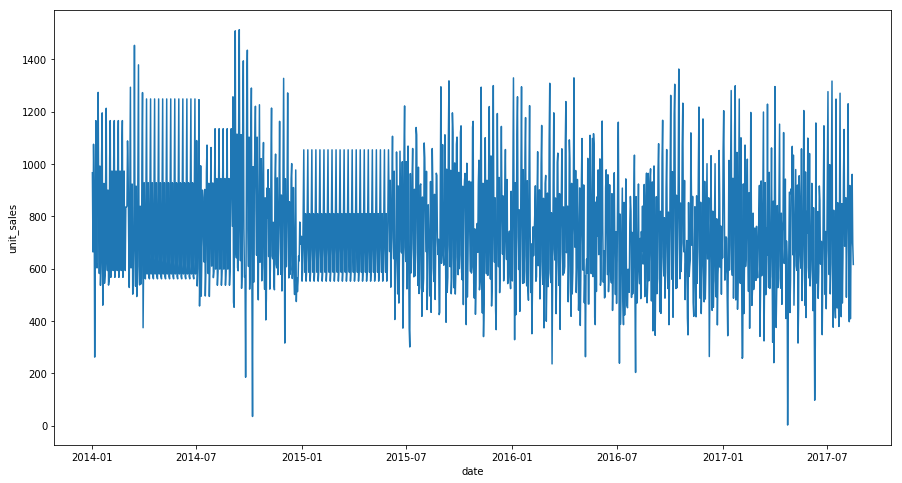

In [27]:
ax = sns.lineplot(x = store_sub['date'], y = store_sub['unit_sales'], ci  = None)

Text(0.5, 1.0, 'Sales by month')

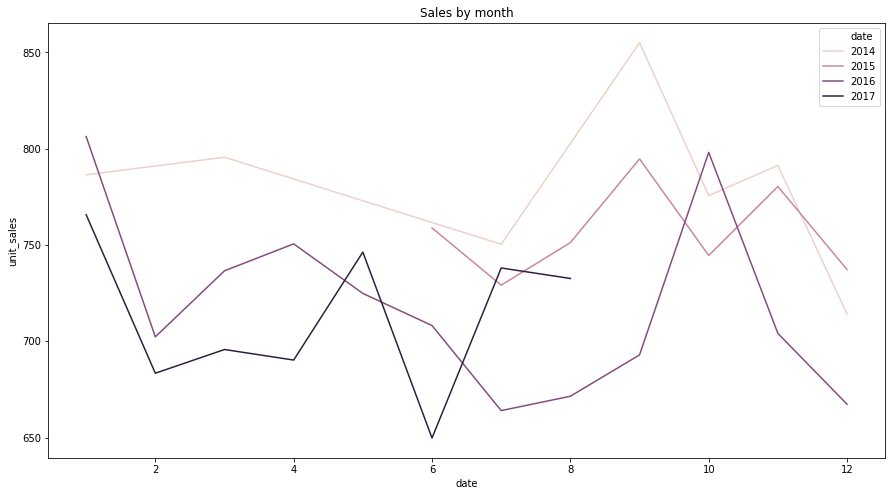

In [11]:
ax = sns.lineplot(x = store_sub['date'].dt.month , y = store_sub['unit_sales'], hue = store_sub['date'].dt.year, ci  = None)
ax.set_title('Sales by month')

Text(0.5, 1.0, 'Sales by day of the week')

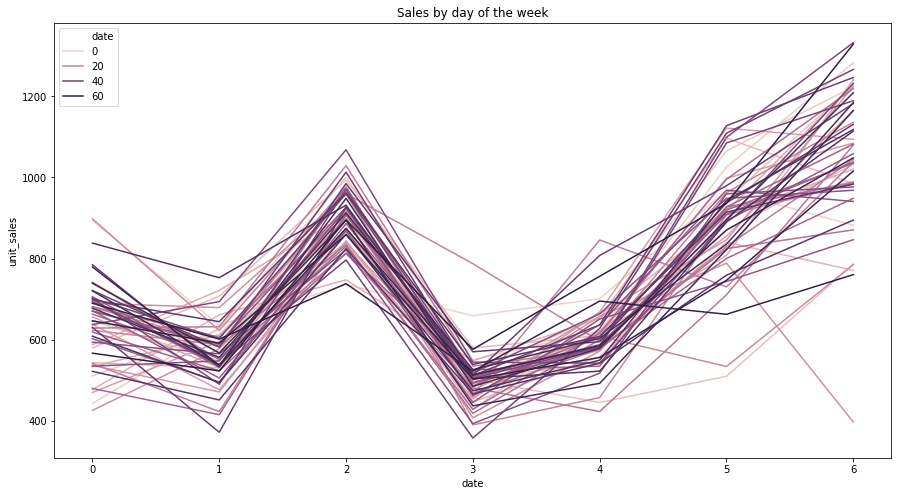

In [12]:
ax = sns.lineplot(x = store_sub['date'].dt.dayofweek , y = store_sub['unit_sales'], hue = store_sub['date'].dt.weekofyear, ci  = None)
ax.set_title('Sales by day of the week')

Text(0.5, 1.0, 'Sales by day of month')

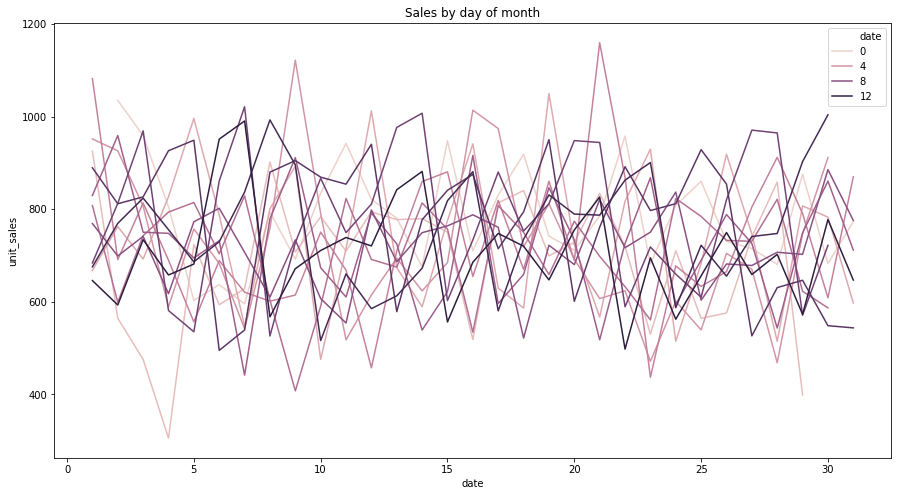

In [13]:
ax = sns.lineplot(x = store_sub['date'].dt.day , y = store_sub['unit_sales'], hue = store_sub['date'].dt.month, ci  = None)
ax.set_title('Sales by day of month')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

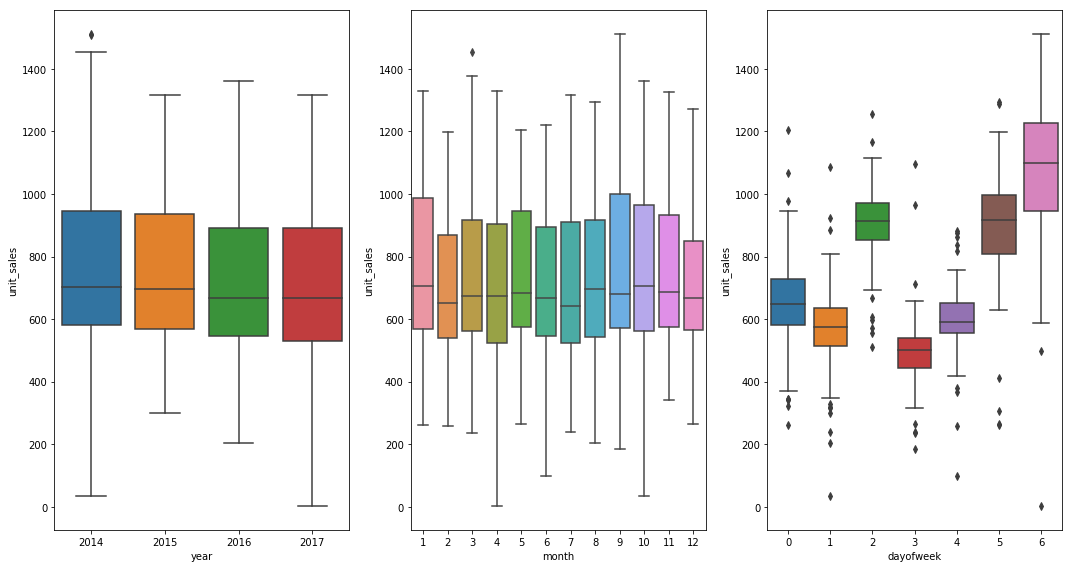

In [14]:
store_sub['year'] = [d.year for d in store_sub.date]
store_sub['month'] = [d.month for d in store_sub.date]
store_sub['dayofyear'] = [d.dayofyear for d in store_sub.date]
store_sub['dayofweek'] = [d.dayofweek for d in store_sub.date]

# Draw Plot
fig, axes = plt.subplots(1, 3)
sns.boxplot(x = 'year', y = 'unit_sales', data = store_sub, ax = axes[0])
sns.boxplot(x = 'month', y = 'unit_sales', data = store_sub, ax = axes[1])
sns.boxplot(x = 'dayofweek', y = 'unit_sales', data = store_sub, ax = axes[2])
fig.tight_layout()

In [15]:
store_sub.drop(['year', 'month', 'dayofweek', 'dayofyear'], axis = 1, inplace = True)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Fill in the missing data 

In [16]:
store_sub.head(50)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,16377457,2014-01-02,44,1503844,966.1490,NaN
1,16442863,2014-01-03,44,1503844,663.4050,NaN
2,16511061,2014-01-04,44,1503844,1075.0000,NaN
3,16578789,2014-01-05,44,1503844,892.6080,NaN
4,16642520,2014-01-06,44,1503844,261.5540,NaN
5,16705308,2014-01-07,44,1503844,646.7160,NaN
6,16768213,2014-01-08,44,1503844,1165.2097,NaN
7,16830673,2014-01-09,44,1503844,620.6760,NaN
8,16892999,2014-01-10,44,1503844,602.2430,NaN
9,16960548,2014-01-11,44,1503844,1090.4050,NaN


In [17]:
# create a list of dates which contains the missing dates in the original dataframe
date_diff = store_sub['date'] - store_sub.shift(periods = 1, axis = 0)['date']

dates = [store_sub['date'].iloc[0]]
for idx, d in enumerate(date_diff[1:]):
    if d == pd.Timedelta('1 days'):
        # no break in the dates
        dates.append(store_sub['date'].iloc[idx + 1])
    else:
        # missing data
        while d > pd.Timedelta('0 days'):
            dates.append(store_sub['date'].iloc[idx + 1] - d + pd.Timedelta('1 days'))
            d -= pd.Timedelta('1 days')
            
dates = pd.DataFrame(dates, columns = ['date'])

In [18]:
store_sub = pd.merge(dates, store_sub, how = 'outer', on = 'date')

try:
    store_sub.drop('onpromotion', axis = 1, inplace = True)
except Exception:
    pass

In [19]:
print(store_sub.shape)
store_sub.head(60)

(1322, 5)


,date,id,store_nbr,item_nbr,unit_sales
0,2014-01-02,16377457.0,44.0,1503844.0,966.1490
1,2014-01-03,16442863.0,44.0,1503844.0,663.4050
2,2014-01-04,16511061.0,44.0,1503844.0,1075.0000
3,2014-01-05,16578789.0,44.0,1503844.0,892.6080
4,2014-01-06,16642520.0,44.0,1503844.0,261.5540
5,2014-01-07,16705308.0,44.0,1503844.0,646.7160
6,2014-01-08,16768213.0,44.0,1503844.0,1165.2097
7,2014-01-09,16830673.0,44.0,1503844.0,620.6760
8,2014-01-10,16892999.0,44.0,1503844.0,602.2430
9,2014-01-11,16960548.0,44.0,1503844.0,1090.4050


In [20]:
def seasonal_mean(ts, i, n, w):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    ts_seas = ts[i::-n]  # previous seasons only
    denom = w*(w**(len(ts_seas) - 1) - 1)/(w-1)
    ts_seas = sum(x for x in (list(map(lambda x: x[1]*(w**x[0]), [x for x in enumerate(ts_seas)]))) if not np.isnan(x)) / denom
    return ts_seas

for idx, row in store_sub.iterrows():
    if type(row['unit_sales']) != np.float:
        store_sub.at[idx, 'unit_sales'] = seasonal_mean(store_sub['unit_sales'], idx, 7, 0.8)

In [21]:
store_sub.head(60)

,date,id,store_nbr,item_nbr,unit_sales
0,2014-01-02,16377457.0,44.0,1503844.0,966.149000
1,2014-01-03,16442863.0,44.0,1503844.0,663.405000
2,2014-01-04,16511061.0,44.0,1503844.0,1075.000000
3,2014-01-05,16578789.0,44.0,1503844.0,892.608000
4,2014-01-06,16642520.0,44.0,1503844.0,261.554000
5,2014-01-07,16705308.0,44.0,1503844.0,646.716000
6,2014-01-08,16768213.0,44.0,1503844.0,1165.209700
7,2014-01-09,16830673.0,44.0,1503844.0,620.676000
8,2014-01-10,16892999.0,44.0,1503844.0,602.243000
9,2014-01-11,16960548.0,44.0,1503844.0,1090.405000


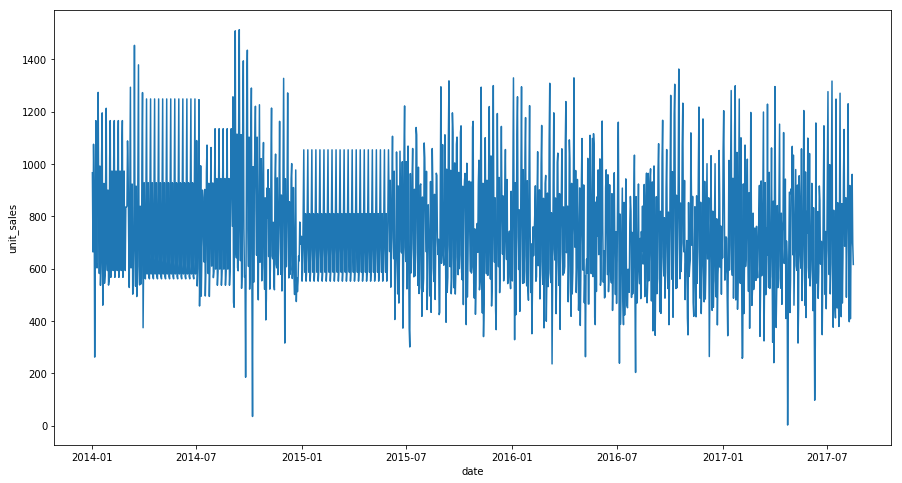

In [28]:
sns.lineplot(x = 'date', y = 'unit_sales', data = store_sub)

<Figure size 1080x576 with 0 Axes>

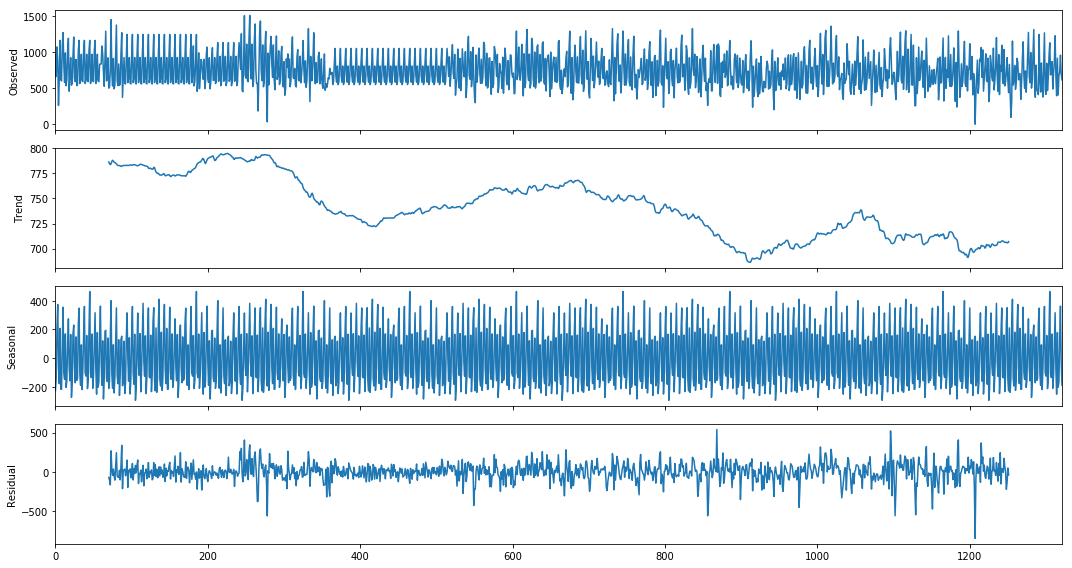

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(store_sub['unit_sales'], freq = 140)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

## Determine if the data is stationary

In [31]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

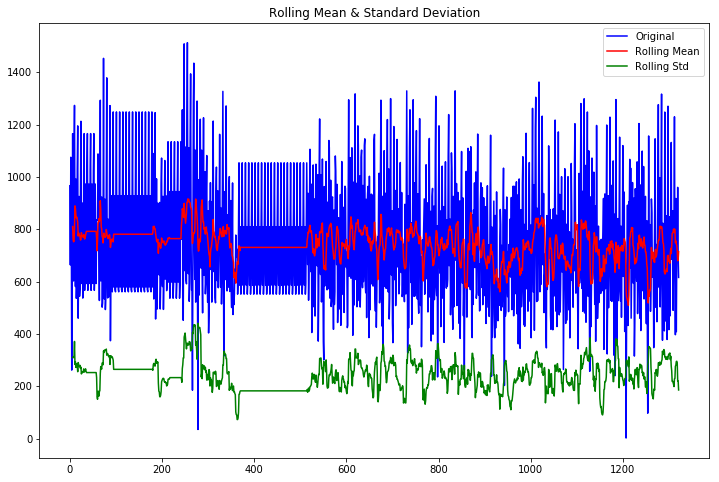

Test Statistic                   -5.152637
p-value                           0.000011
Lags Used                        23.000000
Number of Observations Used    1298.000000
Critical Value (1%)              -3.435398
Critical Value (5%)              -2.863769
Critical Value (10%)             -2.567957
dtype: float64
--------------------------------
Test Statistic            2.017517
p-value                   0.010000
Lags Used                23.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


D:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [32]:
def test_stationarity(timeseries, col):
    
    #Determing rolling statistics
    rol = timeseries[col].rolling(window = 7)
    rolmean = rol.mean()
    rolstd = rol.std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries[col], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # ADF test -- unit root test
    result = adfuller(store_sub[col])
    dfoutput = pd.Series(result[0:4], index = ['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for key, value in result[4].items():
       dfoutput['Critical Value (%s)'% key] = value
    print(dfoutput)

    print('--------------------------------')
    
    # KPSS test
    result = kpss(store_sub[col], regression = 'c')
    kpss_output = pd.Series(result[0:3], index = ['Test Statistic', 'p-value', 'Lags Used'])
    for key, value in result[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)

test_stationarity(store_sub, 'unit_sales')

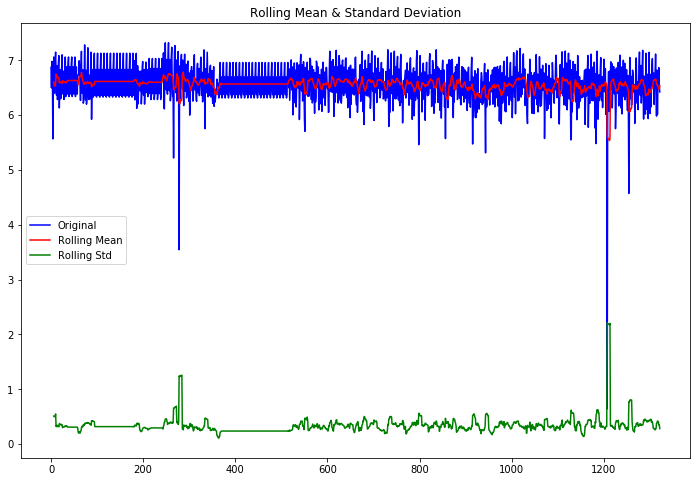

Test Statistic                -5.941530e+00
p-value                        2.254956e-07
Lags Used                      2.100000e+01
Number of Observations Used    1.300000e+03
Critical Value (1%)           -3.435390e+00
Critical Value (5%)           -2.863766e+00
Critical Value (10%)          -2.567955e+00
dtype: float64
--------------------------------
Test Statistic            2.248094
p-value                   0.010000
Lags Used                23.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


D:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [34]:
store_sub['log_unit_sales'] = store_sub['unit_sales'].apply(lambda x: np.log(x))
test_stationarity(store_sub, 'log_unit_sales')

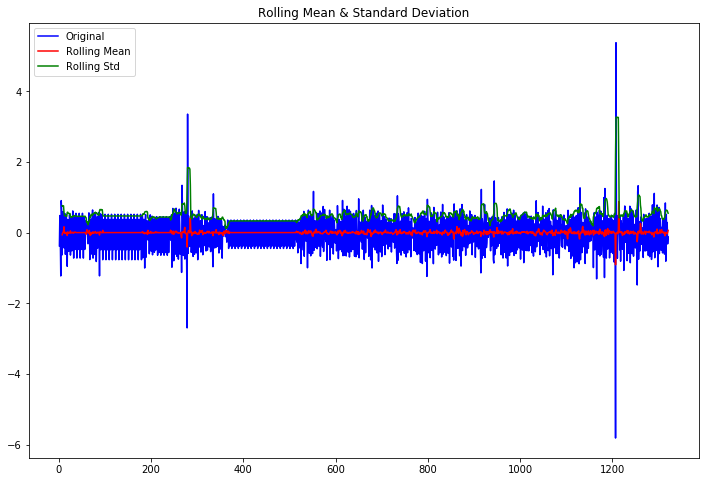

Test Statistic                -1.453247e+01
p-value                        5.303987e-27
Lags Used                      2.000000e+01
Number of Observations Used    1.300000e+03
Critical Value (1%)           -3.435390e+00
Critical Value (5%)           -2.863766e+00
Critical Value (10%)          -2.567955e+00
dtype: float64
--------------------------------
Test Statistic            0.010761
p-value                   0.100000
Lags Used                23.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


D:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [35]:
store_sub['log_unit_sales_diff'] = store_sub['log_unit_sales'] - store_sub['log_unit_sales'].shift()
store_sub = store_sub.iloc[1:, :]
test_stationarity(store_sub, 'log_unit_sales_diff')

D:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


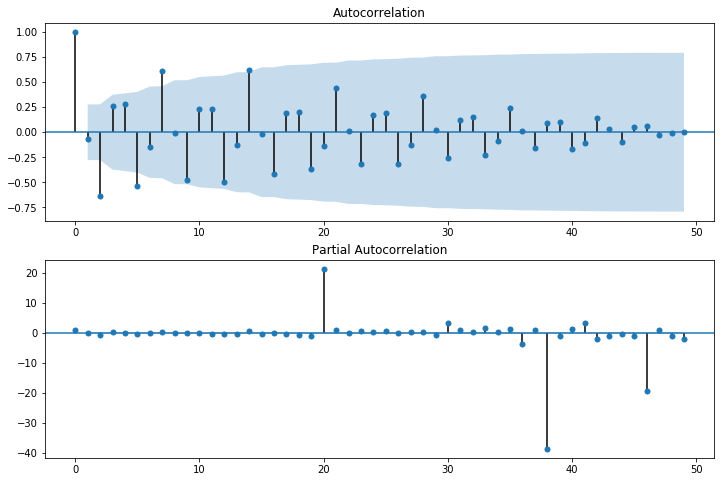

In [36]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_sub['log_unit_sales'].iloc[:50], ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_sub['log_unit_sales'].iloc[:50], ax=ax2)

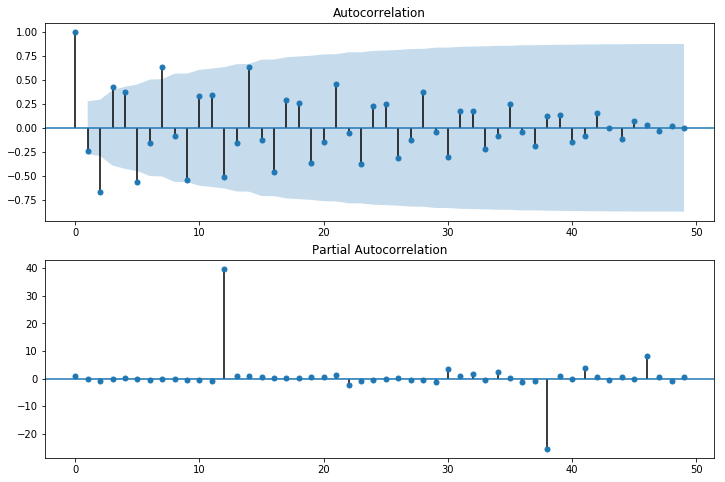

In [37]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_sub['log_unit_sales_diff'].iloc[:50], ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_sub['log_unit_sales_diff'].iloc[:50], ax=ax2)

In [38]:
from pysal.model.spreg import ols, ml_error, ml_lag
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [39]:
train_ratio = 0.7
train, test = store_sub.iloc[:round(train_ratio * store_sub.shape[0]), :], store_sub.iloc[round(train_ratio * store_sub.shape[0]):, :]
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

print(train.shape)
print(test.shape)

(925, 7)
(396, 7)


In [40]:
p, d, q = 7, 1, 0
model  = ARIMA(train['unit_sales'], order = (p, d, q))
model_fit = model.fit(disp = 0)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.unit_sales   No. Observations:                  924
Model:                 ARIMA(7, 1, 0)   Log Likelihood               -5847.964
Method:                       css-mle   S.D. of innovations            135.054
Date:                Sun, 06 Oct 2019   AIC                          11713.929
Time:                        19:36:04   BIC                          11757.387
Sample:                             1   HQIC                         11730.509
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1599      0.927     -0.173      0.863      -1.977       1.657
ar.L1.D.unit_sales    -0.6959      0.032    -21.578      0.000      -0.759      -0.633
ar.L2.D.unit_sales    -0.7562      0.034    -22.080      0.000      -0.823      -0.689
ar.L3.D.unit_sales    -0.6698      0.037    -18.348      0.000      -0.741      -0.598
ar.L4.D.unit_sales    -0.6273      0.037    -16.864      0.000      -0.700      -0.554
ar.L5.D.unit_sales    -0.6527      0.036    -17.958      0.000      -0.724      -0.581
ar.L6.D.unit_sales    -0.6023      0.034    -17.618      0.000      -0.669      -0.535
ar.L7.D.unit_sales     0.1977      0.032      6.116      0.000       0.134       0.261
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9499           -0.4636j            1.0570           -0.4277
AR.2           -0.9499           +0.4636j            1.0570            0.4277
AR.3           -0.2232           -0.9875j            1.0124           -0.2854
AR.4           -0.2232           +0.9875j            1.0124            0.2854
AR.5            0.6437           -0.8134j            1.0373           -0.1435
AR.6            0.6437           +0.8134j            1.0373            0.1435
AR.7            4.1061           -0.0000j            4.1061           -0.0000
-----------------------------------------------------------------------------
"""

                0
count  924.000000
mean     0.046467
std    136.444063
min   -659.297862
25%    -52.948712
50%      1.248490
75%     56.176355
max    591.248782


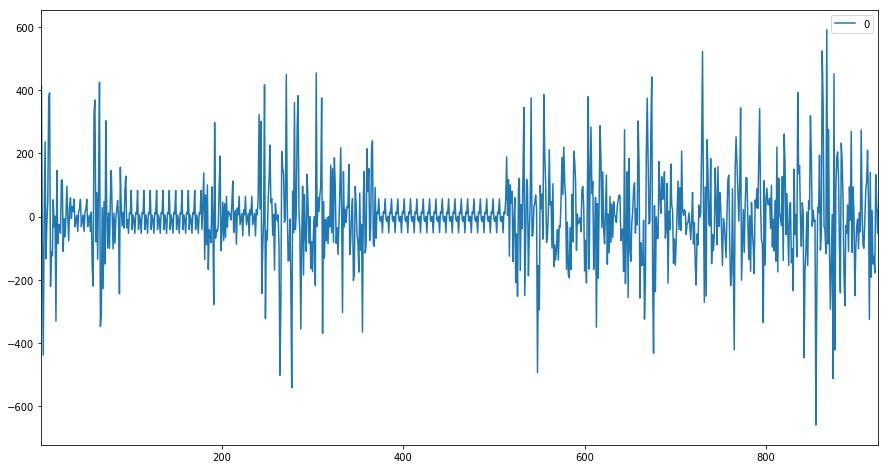

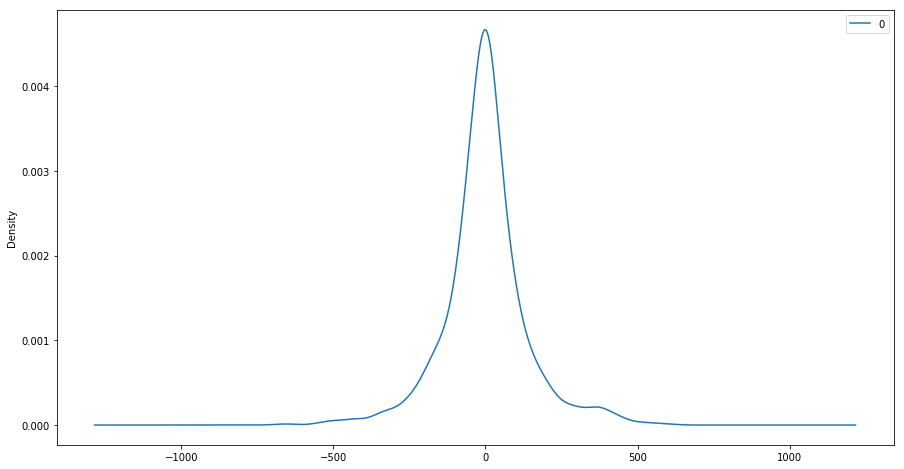

In [41]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind = 'kde')
print(residuals.describe())

In [191]:
history = list(train['unit_sales'])
predictions = []

for i in range(len(test)):
    print(i)
    model = ARIMA(history, order = (p, d, q))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test.iloc[i]['unit_sales']
    history.append(obs)
    print('predicted = {}, expected = {}'.format(yhat, obs))

0
predicted = [523.88319056], expected = 547.582
1
predicted = [754.83114785], expected = 942.623
2
predicted = [915.56886275], expected = 615.776
3
predicted = [394.78738276], expected = 458.13300000000004
4
predicted = [454.51045551], expected = 450.214
5
predicted = [811.61955879], expected = 597.49
6
predicted = [393.74260199], expected = 523.031
7
predicted = [567.03136549], expected = 509.35699999999997
8
predicted = [857.51600878], expected = 771.357
9
predicted = [592.01203831], expected = 875.5
10
predicted = [535.55128351], expected = 818.2139999999999
11
predicted = [570.14283479], expected = 489.47
12
predicted = [607.67692187], expected = 738.2860000000001
13
predicted = [608.27806096], expected = 503.01
14
predicted = [503.66210867], expected = 551.918
15
predicted = [761.81177471], expected = 871.113
16
predicted = [880.69560105], expected = 1033.4189999999999
17
predicted = [817.12432448], expected = 479.92900000000003
18
predicted = [440.32543839], expected = 202.857
1

predicted = [981.2900483], expected = 809.7289999999999
310
predicted = [796.53571247], expected = 1203.913
311
predicted = [761.99292338], expected = 668.4019999999999
312
predicted = [613.50076848], expected = 459.652
313
predicted = [973.9663644], expected = 969.12
314
predicted = [572.68577121], expected = 412.69599999999997
315
predicted = [544.58793606], expected = 817.793
316
predicted = [895.76861837], expected = 735.087
317
predicted = [1047.65328696], expected = 1098.598
318
predicted = [692.8406563], expected = 603.771
319
predicted = [483.49188657], expected = 563.7719999999999
320
predicted = [952.718409], expected = 1039.587
321
predicted = [549.02599831], expected = 533.424
322
predicted = [751.92084961], expected = 595.63
323
predicted = [728.90289507], expected = 732.804
324
predicted = [1009.06985148], expected = 925.5110000000001
325
predicted = [590.85449893], expected = 599.391
326
predicted = [579.47666967], expected = 438.978
327
predicted = [934.09478911], expec

In [203]:
import math

error = mean_squared_error(test['unit_sales'], predictions)
print('Test MSE: {}'.format(error))
print('Test RMSE: {}'.format(math.sqrt(error)))

test['predictions'] = [x[0] for x in predictions]

Test MSE: 34980.42964931167
Test RMSE: 187.03055806287824


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


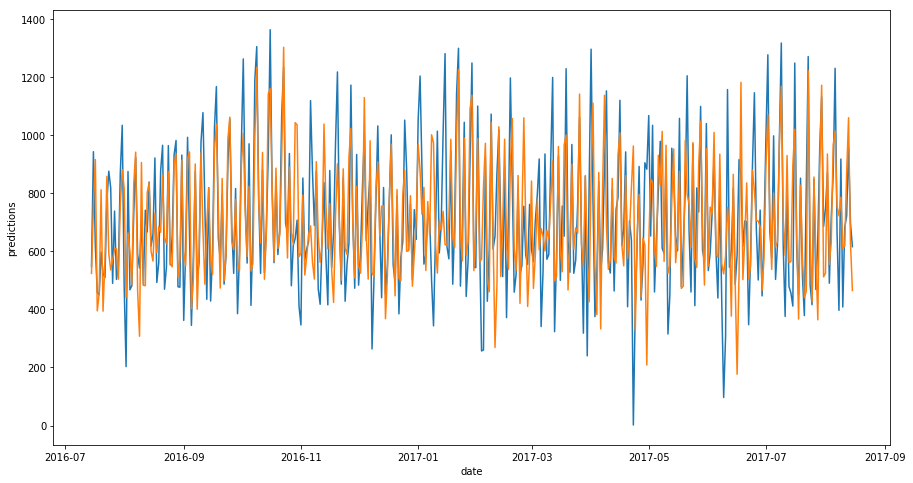

In [205]:
sns.lineplot(x = 'date', y = 'unit_sales', data = test)
sns.lineplot(x = 'date', y = 'predictions', data = test)

## try with log data

In [42]:
p, d, q = 7, 1, 0
model  = ARIMA(train['log_unit_sales'], order = (p, d, q))
model_fit = model.fit(disp = 0)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.log_unit_sales   No. Observations:                  924
Model:                 ARIMA(7, 1, 0)   Log Likelihood                  42.515
Method:                       css-mle   S.D. of innovations              0.230
Date:                Sun, 06 Oct 2019   AIC                            -67.031
Time:                        19:36:07   BIC                            -23.572
Sample:                             1   HQIC                           -50.450
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0002      0.002     -0.126      0.900      -0.003       0.003
ar.L1.D.log_unit_sales    -0.7402      0.033    -22.723      0.000      -0.804      -0.676
ar.L2.D.log_unit_sales    -0.7759      0.036    -21.681      0.000      -0.846      -0.706
ar.L3.D.log_unit_sales    -0.6845      0.039    -17.736      0.000      -0.760      -0.609
ar.L4.D.log_unit_sales    -0.6089      0.040    -15.276      0.000      -0.687      -0.531
ar.L5.D.log_unit_sales    -0.6437      0.038    -16.728      0.000      -0.719      -0.568
ar.L6.D.log_unit_sales    -0.5900      0.036    -16.474      0.000      -0.660      -0.520
ar.L7.D.log_unit_sales     0.1417      0.033      4.327      0.000       0.078       0.206
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9681           -0.4640j            1.0735           -0.4289
AR.2           -0.9681           +0.4640j            1.0735            0.4289
AR.3           -0.2246           -0.9981j            1.0230           -0.2852
AR.4           -0.2246           +0.9981j            1.0230            0.2852
AR.5            0.6587           -0.8274j            1.0575           -0.1430
AR.6            0.6587           +0.8274j            1.0575            0.1430
AR.7            5.2329           -0.0000j            5.2329           -0.0000
-----------------------------------------------------------------------------
"""

                0
count  924.000000
mean    -0.000158
std      0.232486
min     -2.851376
25%     -0.080974
50%      0.008961
75%      0.089057
max      1.978298


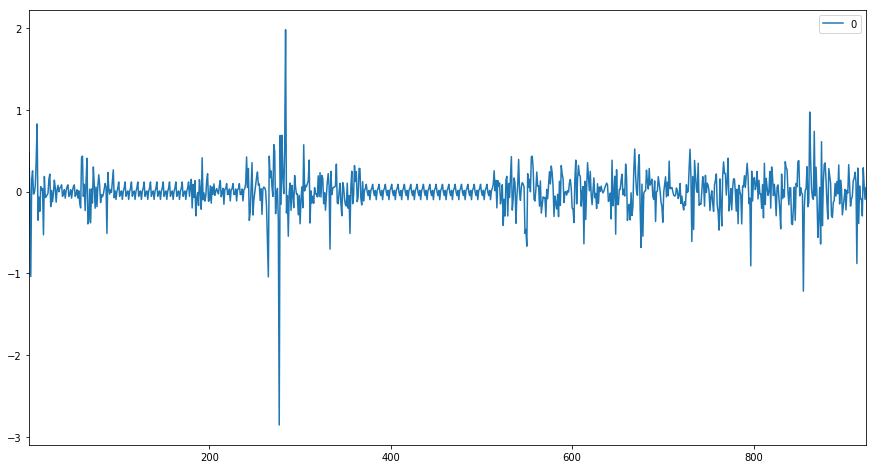

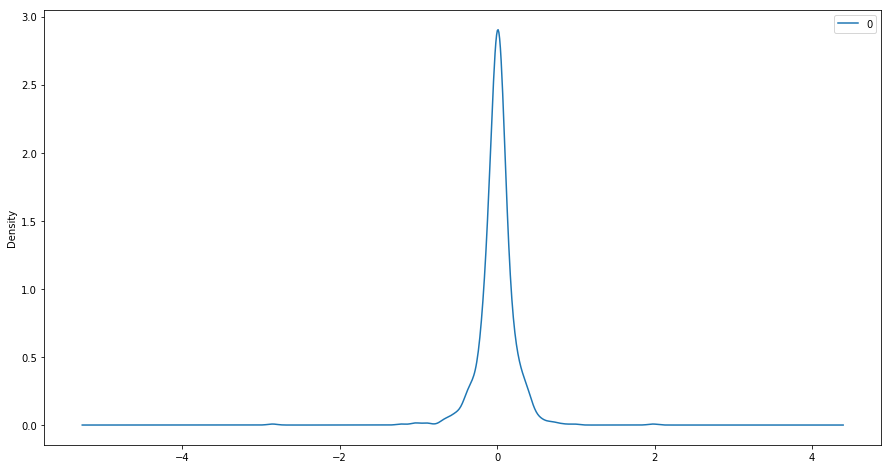

In [43]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind = 'kde')
print(residuals.describe())

In [47]:
history = list(train['log_unit_sales'])
predictions = []

for i in range(len(test)):
    try:
        model = ARIMA(history, order = (p, d, q))
        model_fit = model.fit(disp = 0)
        output = model_fit.forecast()
        yhat = output[0][0]
        predictions.append(yhat)
        obs = test.iloc[i]['log_unit_sales']
        history.append(obs)
        print('predicted = {}, expected = {}'.format(yhat, obs))
    except Exception as e:
        print(i)
        print('--------------------')
        print(e)
        obs = test.iloc[i]['log_unit_sales']
        history.append(obs)
        predictions.append(history[-1])

predicted = 6.587781209384165, expected = 6.8486664147860425
predicted = 6.784136480511628, expected = 6.422883261038148
predicted = 6.089053003455272, expected = 6.127159534971396
predicted = 6.100783476652018, expected = 6.109723025279214
predicted = 6.669638151764043, expected = 6.392737547263937
predicted = 6.056976623971685, expected = 6.259640735730885
predicted = 6.319748249158512, expected = 6.233149145947433
predicted = 6.689815445426885, expected = 6.64815130141515
predicted = 6.40498540778686, expected = 6.774795151725907
predicted = 6.242239202307755, expected = 6.707123916079784
predicted = 6.307194960410276, expected = 6.19332317306486
predicted = 6.419414705811966, expected = 6.604331283403954
predicted = 6.398046423276994, expected = 6.220610050617826
predicted = 6.246158791417434, expected = 6.3133994845177055
predicted = 6.601639667949506, expected = 6.76977170437323
predicted = 6.758787550822382, expected = 6.940628001594652
predicted = 6.659386896154806, expected = 

predicted = 6.329060140234265, expected = 6.611692855946288
predicted = 6.8055588991130875, expected = 6.664503403651266
predicted = 6.86004164024118, expected = 7.02075265941374
predicted = 6.410433158197679, expected = 6.428802929104201
predicted = 6.35381001398389, expected = 6.517653547496687
predicted = 6.735295885790066, expected = 6.847936270072465
predicted = 6.337279442163575, expected = 6.013610016041458
predicted = 6.480593884825885, expected = 6.5582914154517455
predicted = 6.696563828774672, expected = 6.45665033919208
predicted = 6.80426374593922, expected = 0.6429059641231986
predicted = 4.660014379918322, expected = 6.016554641667538
predicted = 6.6922315023274255, expected = 6.457092994187418
predicted = 5.903555543011462, expected = 6.793405592630911
predicted = 5.743044994189095, expected = 6.068122301516599
predicted = 6.469799361055377, expected = 6.31732171412903
predicted = 6.240519881918614, expected = 6.807454165161019
predicted = 2.354072259596328, expected = 

In [54]:
import math

predictions_actual = list(map(lambda x: math.exp(x), predictions))
obs_actual = list(map(lambda x: math.exp(x), test['log_unit_sales']))
error = mean_squared_error(obs_actual, predictions_actual)
print('Test MSE: {}'.format(error))
print('Test RMSE: {}'.format(math.sqrt(error)))

test['predictions'] = predictions_actual

Test MSE: 37643.36896056951
Test RMSE: 194.01899123686195


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


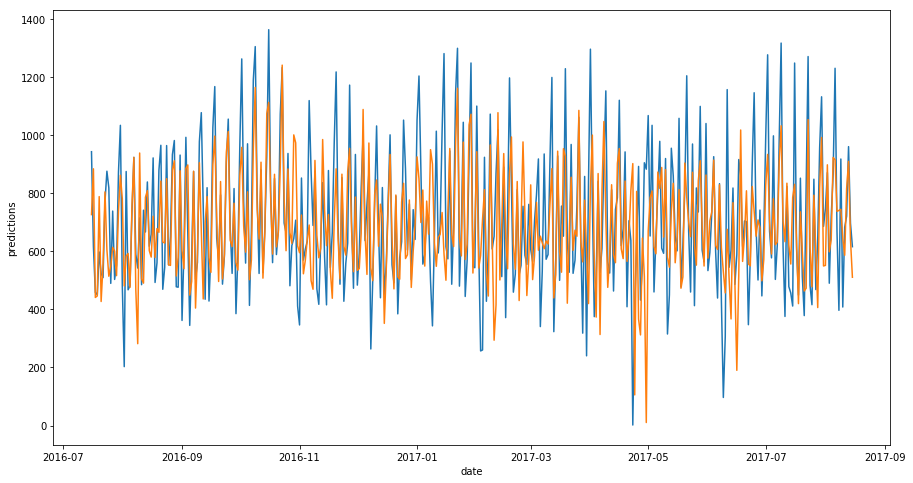

In [55]:
sns.lineplot(x = 'date', y = 'unit_sales', data = test)
sns.lineplot(x = 'date', y = 'predictions', data = test)

oil price, onpromotion, payday data

## Gridsearch

In [361]:
P = [1, 2, 3, 4, 5, 6, 7]
D = [0, 1, 2]
Q = [1, 2, 3, 4, 5, 6, 7]

for p in P:
    for d in D:
        for q in Q:
            print('p: ' + str(p) + ', d: ' + str(d) + ', q: ' + str(q))
            try:
                history = list(train['unit_sales_filled'])
                predictions = []
                for i in range(len(test)):
                    model = ARIMA(history, order = (p, d, q))
                    model_fit = model.fit(disp = 0)
                    output = model_fit.forecast()
                    yhat = output[0]
                    predictions.append(yhat)
                    obs = test.iloc[i]['unit_sales_filled']
                    history.append(obs)
    #                 print('predicted = {}, expected = {}'.format(yhat, obs))

                error = mean_squared_error(test['unit_sales_filled'], predictions)
                print('Test MSE: {}'.format(error))
                print('Test RMSE: {}'.format(math.sqrt(error)))
            except Exception as e:
                print(e)

p: 1, d: 0, q: 1
Test MSE: 55322.518546147345
Test RMSE: 235.207394752264
p: 1, d: 0, q: 2
Test MSE: 56863.19423606551
Test RMSE: 238.4600474630195
p: 1, d: 0, q: 3


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 54864.4718193466
Test RMSE: 234.23166271737603
p: 1, d: 0, q: 4
Test MSE: 54790.90293351574
Test RMSE: 234.07456703690758
p: 1, d: 0, q: 5
Test MSE: 49890.79226259136
Test RMSE: 223.36246833922516
p: 1, d: 0, q: 6
Test MSE: 48106.89149004785
Test RMSE: 219.33283267684263
p: 1, d: 0, q: 7
Test MSE: 41723.13353907997
Test RMSE: 204.26241342714027
p: 1, d: 1, q: 1


D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


SVD did not converge
p: 1, d: 1, q: 2
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 1, d: 1, q: 3
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 1, d: 1, q: 4
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 1, d: 1, q: 5
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 1, d: 1, q: 6
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 1, d: 1, q: 7
Test MSE: 45574.29160145541
Test RMSE: 213.48136125070826
p: 1, d: 2, q: 1
Th

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


SVD did not converge
p: 2, d: 0, q: 3


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SVD did not converge
p: 2, d: 0, q: 4
SVD did not converge
p: 2, d: 0, q: 5
SVD did not converge
p: 2, d: 0, q: 6


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SVD did not converge
p: 2, d: 0, q: 7


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SVD did not converge
p: 2, d: 1, q: 1


D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


SVD did not converge
p: 2, d: 1, q: 2
Test MSE: 53948.88633807035
Test RMSE: 232.268995645287
p: 2, d: 1, q: 3


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  n

SVD did not converge
p: 2, d: 1, q: 4
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 2, d: 1, q: 5
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 2, d: 1, q: 6
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 2, d: 1, q: 7


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SVD did not converge
p: 2, d: 2, q: 1
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 2, d: 2, q: 2


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-pac

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base

SVD did not converge
p: 2, d: 2, q: 3
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 2, d: 2, q: 4
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 2, d: 2, q: 5
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 2, d: 2, q: 6
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 2, d: 2, q: 7
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 3, d: 0, q: 1
Test MSE: 56253.26180038688
Test RMSE: 237.17770089194067
p: 3, d: 0, q: 2


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


SVD did not converge
p: 3, d: 0, q: 3


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:5

SVD did not converge
p: 3, d: 0, q: 4


D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:674: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:676: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


SVD did not converge
p: 3, d: 0, q: 5
SVD did not converge
p: 3, d: 0, q: 6
SVD did not converge
p: 3, d: 0, q: 7


D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:676: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


SVD did not converge
p: 3, d: 1, q: 1


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-pac

Test MSE: 53486.239149384746
Test RMSE: 231.27092153875452
p: 3, d: 1, q: 2


D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


SVD did not converge
p: 3, d: 1, q: 3


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:4

SVD did not converge
p: 3, d: 1, q: 4
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 3, d: 1, q: 5
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 3, d: 1, q: 6
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 3, d: 1, q: 7


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SVD did not converge
p: 3, d: 2, q: 1
Test MSE: 69312.90531982134
Test RMSE: 263.2734421088108
p: 3, d: 2, q: 2
Test MSE: 69429.39999893011
Test RMSE: 263.4945919728337
p: 3, d: 2, q: 3
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 3, d: 2, q: 4
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 3, d: 2, q: 5
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 3, d: 2, q: 6
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 3, d: 2, q: 7
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a differen

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


SVD did not converge
p: 4, d: 0, q: 3
SVD did not converge
p: 4, d: 0, q: 4
SVD did not converge
p: 4, d: 0, q: 5


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base

SVD did not converge
p: 4, d: 0, q: 6


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SVD did not converge
p: 4, d: 0, q: 7


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SVD did not converge
p: 4, d: 1, q: 1


D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


SVD did not converge
p: 4, d: 1, q: 2


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 52023.14247237908
Test RMSE: 228.08582260276302
p: 4, d: 1, q: 3


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


SVD did not converge
p: 4, d: 1, q: 4
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 4, d: 1, q: 5
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 4, d: 1, q: 6
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 4, d: 1, q: 7


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


SVD did not converge
p: 4, d: 2, q: 1


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-pac

Test MSE: 69417.57509460016
Test RMSE: 263.4721524081818
p: 4, d: 2, q: 2


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-pac

Test MSE: 69688.49448628616
Test RMSE: 263.9857846291845
p: 4, d: 2, q: 3
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 4, d: 2, q: 4
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 4, d: 2, q: 5
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 4, d: 2, q: 6
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 4, d: 2, q: 7
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 5, d: 0, q: 1
Test MSE: 57590.37001366733
Test RMSE: 23

D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


SVD did not converge
p: 5, d: 0, q: 3
SVD did not converge
p: 5, d: 0, q: 4


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SVD did not converge
p: 5, d: 0, q: 5


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:4

SVD did not converge
p: 5, d: 0, q: 6


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base

SVD did not converge
p: 5, d: 0, q: 7


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SVD did not converge
p: 5, d: 1, q: 1
Test MSE: 52247.2830387328
Test RMSE: 228.576645873398
p: 5, d: 1, q: 2
Test MSE: 47292.27602151481
Test RMSE: 217.46787353886276
p: 5, d: 1, q: 3


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-pac

SVD did not converge
p: 5, d: 1, q: 4


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


SVD did not converge
p: 5, d: 1, q: 5


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


SVD did not converge
p: 5, d: 1, q: 6


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: Converg

SVD did not converge
p: 5, d: 1, q: 7


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:4

SVD did not converge
p: 5, d: 2, q: 1


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 67262.25801991964
Test RMSE: 259.3496828992078
p: 5, d: 2, q: 2


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divid

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: Hessian

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWa

SVD did not converge
p: 5, d: 2, q: 3
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 5, d: 2, q: 4
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 5, d: 2, q: 5
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 5, d: 2, q: 6
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 5, d: 2, q: 7
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p: 6, d: 0, q: 1
Test MSE: 51836.66481713303
Test RMSE: 227.6766672655172
p: 6, d: 0, q: 2


D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


SVD did not converge
p: 6, d: 0, q: 3


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SVD did not converge
p: 6, d: 0, q: 4


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:4

SVD did not converge
p: 6, d: 0, q: 5


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:5

SVD did not converge
p: 6, d: 0, q: 6


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SVD did not converge
p: 6, d: 0, q: 7
SVD did not converge
p: 6, d: 1, q: 1
Test MSE: 34663.89101263544
Test RMSE: 186.18241327428174
p: 6, d: 1, q: 2
Test MSE: 34853.94765588014
Test RMSE: 186.69211996193127
p: 6, d: 1, q: 3
Test MSE: 35034.01723601926
Test RMSE: 187.1737621463523
p: 6, d: 1, q: 4


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-pac

Test MSE: 35745.51690600884
Test RMSE: 189.06484841452902
p: 6, d: 1, q: 5


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-pac

SVD did not converge
p: 6, d: 1, q: 6


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\stats

SVD did not converge
p: 6, d: 1, q: 7


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


KeyboardInterrupt: 